# Data exercises Chapter 4 - Linear Regression for Continuous Outcomes

Load the `sociological_data` data set via the `peopleanalyticsdata` package or [download it from the internet](http://peopleanalytics-regression-book.org/data/sociological_data.csv). This data represents a sample of information obtained from individuals who participated in a global research study and contains the following fields:

* `annual_income_ppp`:  The annual income of the individual in PPP adjusted US dollars
* `average_wk_hrs`:  The average number of hours per week worked by the individual
* `education_months`: The total number of months spent by the individual in formal primary, secondary and tertiary education
* `region`:  The region of the world where the individual lives
* `job_type`: Whether the individual works in a skilled or unskilled profession
* `gender`: The gender of the individual
* `family_size`:  The size of the individual's family of dependents
* `work_distance`:  The distance between the individual's residence and workplace in kilometers
* `languages`:  The number of languages spoken fluently by the individual

Conduct some exploratory data analysis on this data set.  Including:

1. Identify the extent to which missing data is an issue.
2. Determine if the data types are appropriate for analysis.
3. Using a correlation matrix, pairplot or alternative method, identify whether collinearity is present in the data.
4. Identify and discuss anything else interesting that you see in the data.


In [24]:
import numpy as np
import pandas as pd
import peopleanalyticsdata as pad

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

data = pad.sociological_data()

data.sample(10)

,annual_income_ppp,average_wk_hrs,education_months,region,job_type,gender,family_size,work_distance,languages
1201,102069.0,49.0,208.0,Eastern Asia,Skilled,M,4.0,0.0,1.0
294,71732.0,50.0,166.0,Southern Asia,Unskilled,F,4.0,0.0,1.0
1057,81254.0,39.0,201.0,Eastern Europe,Skilled,M,4.0,0.0,1.0
2512,90776.0,39.0,193.0,Western Asia,Unskilled,M,2.0,NaN,NaN
2281,81033.0,38.0,187.0,Latin America and the Caribbean,Unskilled,M,NaN,0.0,1.0
270,73503.0,43.0,177.0,Latin America and the Caribbean,Unskilled,M,2.0,0.0,1.0
693,89669.0,40.0,194.0,Latin America and the Caribbean,Unskilled,M,4.0,1.0,1.0
241,119564.0,37.0,229.0,Western Europe,Skilled,M,1.0,0.0,1.0
780,83690.0,39.0,224.0,Northern Europe,Unskilled,M,3.0,0.0,1.0
1500,97420.0,36.0,212.0,Southern Europe,Skilled,M,5.0,0.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   annual_income_ppp  2608 non-null   float64
 1   average_wk_hrs     2584 non-null   float64
 2   education_months   2599 non-null   float64
 3   region             2618 non-null   object 
 4   job_type           2618 non-null   object 
 5   gender             2595 non-null   object 
 6   family_size        2427 non-null   float64
 7   work_distance      2206 non-null   float64
 8   languages          2206 non-null   float64
dtypes: float64(6), object(3)
memory usage: 184.2+ KB


It looks like over 2618 total entries, missing data are mostly in the columns `work_distance` and `languages`, and to lower extent in `family_size`.

In [25]:
for item in data.columns:
    print(f"The proportion of NaN in {item} column = {sum(data[item].isna()) / len(data) * 100:.1f}%")

The proportion of NaN in annual_income_ppp column = 0.4%
The proportion of NaN in average_wk_hrs column = 1.3%
The proportion of NaN in education_months column = 0.7%
The proportion of NaN in region column = 0.0%
The proportion of NaN in job_type column = 0.0%
The proportion of NaN in gender column = 0.9%
The proportion of NaN in family_size column = 7.3%
The proportion of NaN in work_distance column = 15.7%
The proportion of NaN in languages column = 15.7%


In [56]:
data['languages'].unique()

array([ 1., nan,  2.,  5.,  4.])

In [57]:
data['languages'].value_counts(dropna=False)

1.0    2180
NaN     412
2.0      21
5.0       4
4.0       1
Name: languages, dtype: int64

In [58]:
data['work_distance'].unique()

array([  3.,   0.,   2.,   1.,  nan,   4.,  13.,  12.,  11.,  16.,  15.,
        14.,   8.,   7.,   6.,   5., 105.,  10.,  96.,  94.,  93.,  91.,
        21.,  20.,  19.,  18.,   9.])

In [59]:
data['work_distance'].value_counts(dropna=False)

0.0      1582
NaN       412
1.0       343
2.0        92
3.0        58
4.0        38
5.0        20
6.0        12
7.0        11
10.0        8
15.0        6
14.0        5
8.0         5
11.0        5
16.0        3
12.0        3
21.0        2
13.0        2
19.0        2
20.0        2
18.0        1
96.0        1
91.0        1
93.0        1
94.0        1
105.0       1
9.0         1
Name: work_distance, dtype: int64

In [29]:
data['work_distance'].median()

0.0

In [30]:
data['family_size'].unique()

array([ 5.,  4.,  3., nan,  2.,  1.,  6.,  0.,  7.,  8., 10.])

In [60]:
data['family_size'].value_counts(dropna=False)

3.0     643
4.0     516
2.0     504
5.0     358
1.0     246
NaN     191
6.0      80
7.0      42
0.0      26
8.0      10
10.0      2
Name: family_size, dtype: int64

For `languages` we could replace all Nan by 1 as this is the most common value in this categorical variable.  
For `family_size`, the extent of missing data is not huge, so we can decide to drop all rows with missing values if necessary.  
For `work_distance` all NaN could be substituted for the mean or the median value (somewhere between 0 and 1), however this metric might be very important for regression, so we could accept to drop uncomplete rows in particular occasions. This may be the most problematic variable to deal with in this dataset.

In [69]:
data['gender'].value_counts(dropna=False)

M      1911
F       684
NaN      23
Name: gender, dtype: int64

`job-type` can be transformed into a binary boolean category with `skilled_profession` as True or False.  
To some extent, the gender could also be transform into boolean but it's less usefull.  
`family_size` and `languages` can be transmormed from float64 to int16.  
Finally, for fun, we can changeg the `region` into a category.  

However at the end we will run a regression model with dummy variables, so transforming into categories may not be super usefull now.

In [26]:
#data['skilled_profession'] = data['job_type'].map({'Skilled': True, 'Unskilled': False})
# data['family_size'] = data['family_size'].astype('Int32') # Int32 instead of int32 as NaN as supposed to be float, pandas introduced pd.NA recently
# data['languages'] = data['languages'].astype('Int32')
data['region'] = data['region'].astype('category') # unordered

In [27]:
data.head()

,annual_income_ppp,average_wk_hrs,education_months,region,job_type,gender,family_size,work_distance,languages
0,66417.0,50.0,157.0,Southern Asia,Unskilled,F,5.0,3.0,1.0
1,55124.0,50.0,156.0,Southern Asia,Unskilled,F,5.0,0.0,1.0
2,55124.0,50.0,155.0,Southern Asia,Unskilled,F,5.0,3.0,1.0
3,54238.0,50.0,154.0,Southern Asia,Unskilled,F,5.0,0.0,1.0
4,53573.0,50.0,150.0,Southern Asia,Unskilled,F,4.0,0.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   annual_income_ppp  2608 non-null   float64 
 1   average_wk_hrs     2584 non-null   float64 
 2   education_months   2599 non-null   float64 
 3   region             2618 non-null   category
 4   job_type           2618 non-null   object  
 5   gender             2595 non-null   object  
 6   family_size        2427 non-null   float64 
 7   work_distance      2206 non-null   float64 
 8   languages          2206 non-null   float64 
dtypes: category(1), float64(6), object(2)
memory usage: 167.0+ KB


In [149]:
data.columns

Index(['annual_income_ppp', 'average_wk_hrs', 'education_months', 'region',
       'job_type', 'gender', 'family_size', 'work_distance', 'languages'],
      dtype='object')

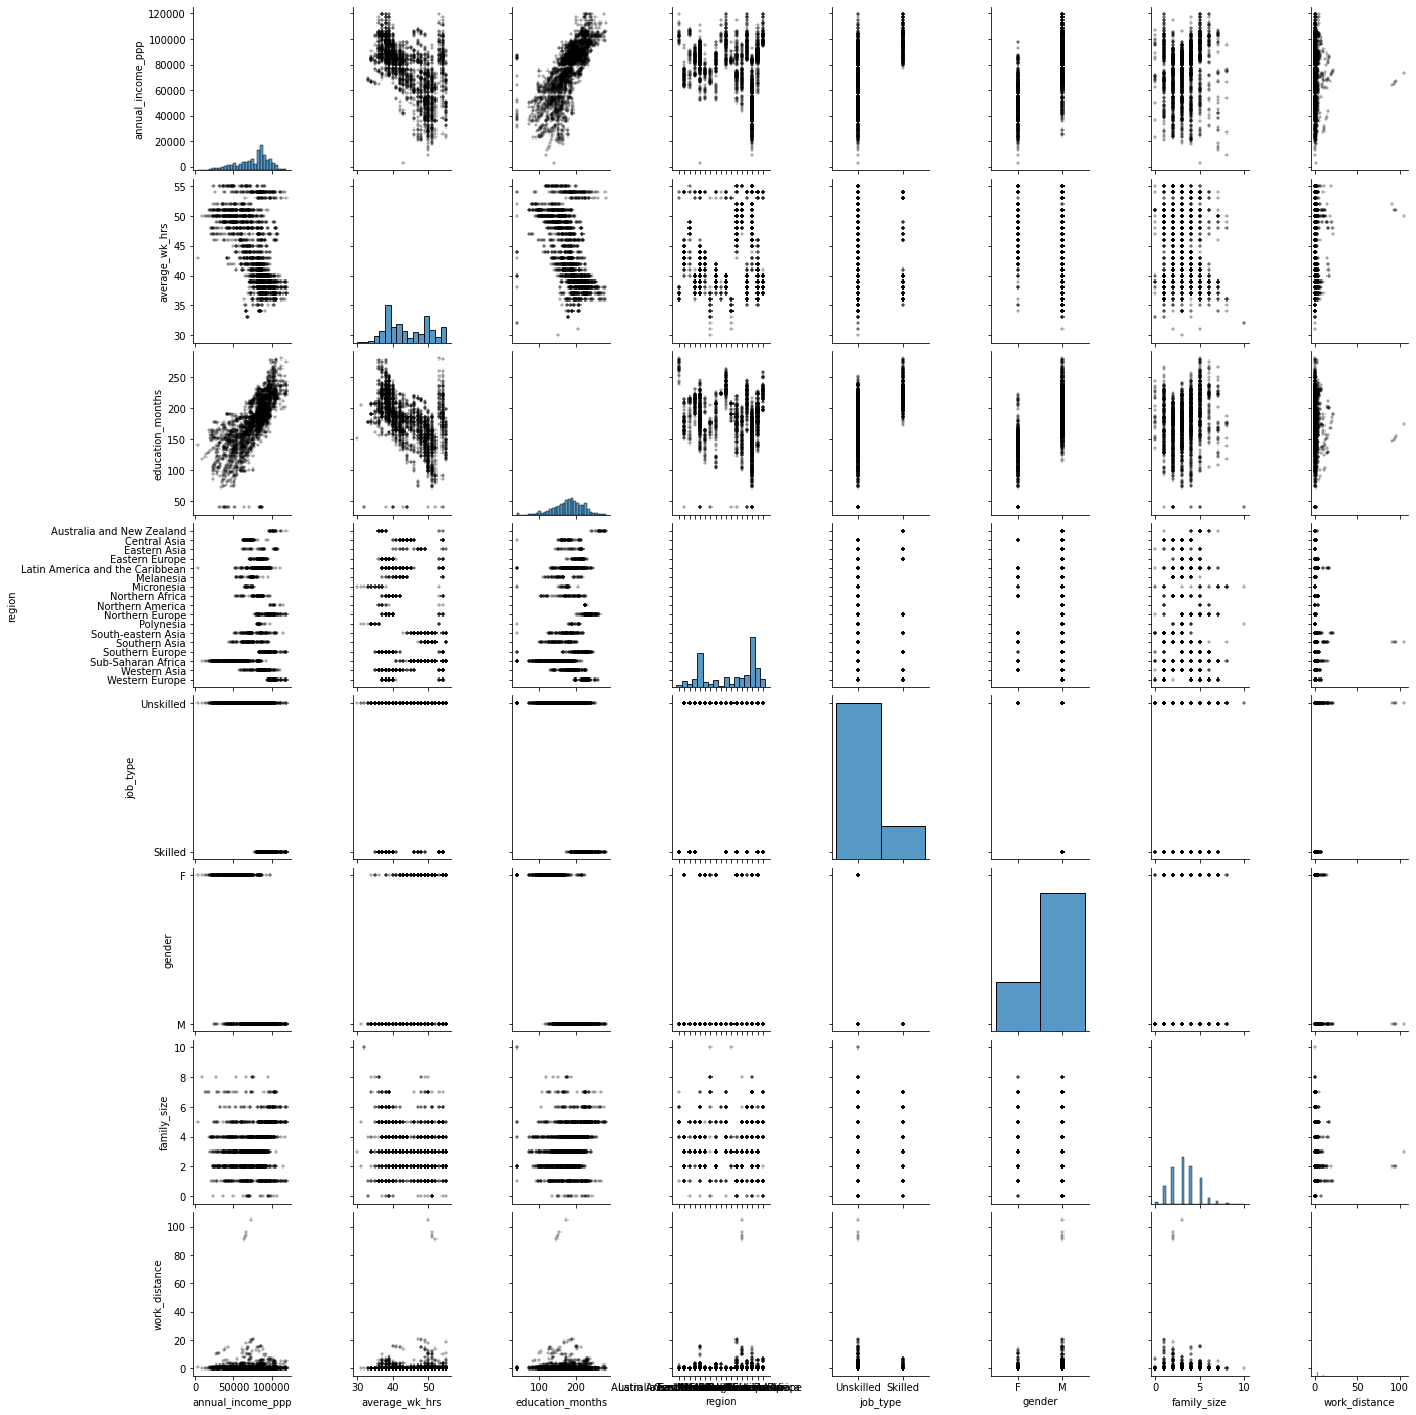

In [28]:
sns.pairplot(
    data, #data.drop(columns=['skilled_profession']),
    vars=['annual_income_ppp', 'average_wk_hrs', 'education_months', 'region', 'job_type', 'gender', 'family_size', 'work_distance'], # to force categories to show up
    dropna=False,
    plot_kws={'marker': '+', 'size': 10, 'color': 'black'},
    );

Very interesting correlation between `annual_income_ppp` and `education_months`, and the negative correlations between `annual_income_ppp` and `average_wk_hrs` which seems to be connected to `education_months`.  
It's difficult to see correlation with `work_distance` which would need another scale, e.g. logarithmic. Nevertheless the `languages` seems to correlate with `work_distance`, although the number of data points decrease with distance.  Interestingly, it looks like the correlation  between `education_months` and `family_size` ressemble an inverse bell shape with a bottom achieved around a value of 2. Similarly, time of education doesn't seem to be correlated with the number of languages.

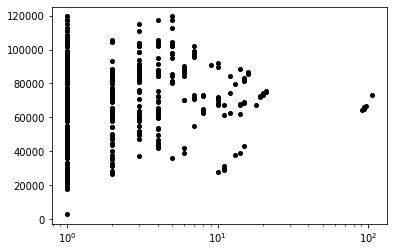

In [29]:
plt.plot(data['work_distance'], data['annual_income_ppp'], linestyle='none', marker='o', ms=4, color='k')
plt.xscale('log');

Prepare to build a linear regression model to explain the variation in `annual_income_ppp` using the other data in the data set.

5. Are there any fields which you believe should not be included in the model?  If so, why?
6. Would you consider imputing missing data for some or all fields where it is an issue?  If so, what might be some simple ways to impute the missing data?
7. Which variables are categorical?  Convert these variables to dummy variables using a convenient function or using your own approach.

<AxesSubplot:xlabel='languages', ylabel='work_distance'>

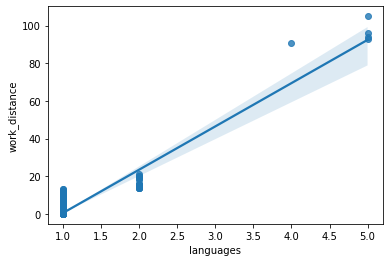

In [8]:
sns.regplot(
    x='languages',
    y='work_distance',
    data=data.dropna()
)

The distribution of `languages` is super skewed, and the data may not bring a lot of information, so we drop this variable.  
We keep `work_distance` for the time being, but if so we need to impute the missing values.  
Looking at the pairplot and the linear regression plot just above, we could use the data from `languages` to determine the values of `work_distance`, check if that helps, otherwise we use a simple imputer e.g. mean/median or mode. However, most if not all of the missing values in `languages` are associated to missing values in `work_distance`, so this regression will be useless.  
There is no other suitable relationship to obtain the most probable value for missing data in `work_distance`, so we decide to impute with a value of 0.99.

In [9]:
data['work_distance'].mean()

0.985040797824116

In [10]:
data[data['work_distance'].isna()]

,annual_income_ppp,average_wk_hrs,education_months,region,job_type,gender,family_size,work_distance,languages
64,91662.0,42.0,201.0,Latin America and the Caribbean,Unskilled,M,NaN,NaN,NaN
65,91219.0,42.0,201.0,Latin America and the Caribbean,Unskilled,M,3.0,NaN,NaN
66,90998.0,42.0,201.0,Latin America and the Caribbean,Unskilled,M,3.0,NaN,NaN
67,90555.0,42.0,200.0,Latin America and the Caribbean,Unskilled,M,3.0,NaN,NaN
68,90112.0,42.0,203.0,Latin America and the Caribbean,Unskilled,M,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2581,60217.0,46.0,137.0,Western Asia,Unskilled,F,3.0,NaN,NaN
2582,59553.0,46.0,135.0,Western Asia,Unskilled,F,3.0,NaN,NaN
2583,58667.0,46.0,133.0,Western Asia,Unskilled,F,2.0,NaN,NaN
2584,57781.0,46.0,132.0,Western Asia,Unskilled,F,2.0,NaN,NaN


<AxesSubplot:xlabel='average_wk_hrs', ylabel='work_distance'>

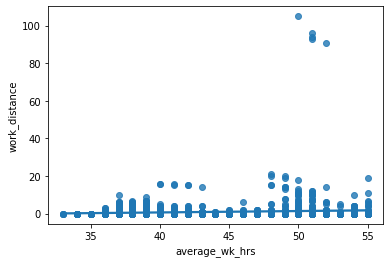

In [30]:
sns.regplot(
    x='average_wk_hrs',
    y='work_distance',
    data=data.dropna()
)

In [31]:
data['work_distance'] = data['work_distance'].fillna(round(data['work_distance'].mean(), 2))
data.drop(columns=['languages'], inplace=True)

In [32]:
data.dropna(how='any', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399 entries, 0 to 2617
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   annual_income_ppp  2399 non-null   float64 
 1   average_wk_hrs     2399 non-null   float64 
 2   education_months   2399 non-null   float64 
 3   region             2399 non-null   category
 4   job_type           2399 non-null   object  
 5   gender             2399 non-null   object  
 6   family_size        2399 non-null   float64 
 7   work_distance      2399 non-null   float64 
dtypes: category(1), float64(5), object(2)
memory usage: 153.0+ KB


In [33]:
dummy_variables = ['region', 'job_type', 'gender']

dummies = pd.get_dummies(
    data=data,
    columns=dummy_variables,
    drop_first=False,
)

In [15]:
dummies.head()

,annual_income_ppp,average_wk_hrs,education_months,family_size,work_distance,region_Australia and New Zealand,region_Central Asia,region_Eastern Asia,region_Eastern Europe,region_Latin America and the Caribbean,...,region_South-eastern Asia,region_Southern Asia,region_Southern Europe,region_Sub-Saharan Africa,region_Western Asia,region_Western Europe,job_type_Skilled,job_type_Unskilled,gender_F,gender_M
0,66417.0,50.0,157.0,5.0,3.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,55124.0,50.0,156.0,5.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,55124.0,50.0,155.0,5.0,3.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,54238.0,50.0,154.0,5.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,53573.0,50.0,150.0,4.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [34]:
dummies.columns

Index(['annual_income_ppp', 'average_wk_hrs', 'education_months',
       'family_size', 'work_distance', 'region_Australia and New Zealand',
       'region_Central Asia', 'region_Eastern Asia', 'region_Eastern Europe',
       'region_Latin America and the Caribbean', 'region_Melanesia',
       'region_Micronesia', 'region_Northern Africa',
       'region_Northern America', 'region_Northern Europe', 'region_Polynesia',
       'region_South-eastern Asia', 'region_Southern Asia',
       'region_Southern Europe', 'region_Sub-Saharan Africa',
       'region_Western Asia', 'region_Western Europe', 'job_type_Skilled',
       'job_type_Unskilled', 'gender_F', 'gender_M'],
      dtype='object')

Run and interpret the model.  For convenience, and to avoid long formula strings, you can use the formula notation `annual_income_ppp ~ .` which means 'regress `annual_income` against everything else.  You can also remove fields this way, for example `annual_income_ppp ~ . - family_size`.

1.  Determine what variables are significant predictors of annual income and what is the effect of each on the outcome.
2.  Determine the overall fit of the model.
3.  Do some simple analysis on the residuals of the model to determine if the model is safe to interpret.
4.  Experiment with improving the model fit through possible interaction terms or non-linear extensions.
5.  Comment on your results.  Did anything in the results surprise you?  If so, what might be possible explanations for this.
6.  Explain why you would or would not be comfortable using a model like this in a predictive setting---for example to help employers determine the right pay for employees.

In [44]:
y = dummies['annual_income_ppp']
X = dummies[dummies.columns.drop('annual_income_ppp')]

X = sm.add_constant(X)

model1 = sm.OLS(y, X)

est1 = model1.fit()
est1.summary2()

C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Ordinary least squares
====================================================================================================
Model:                          OLS                         Adj. R-squared:               0.795     
Dependent Variable:             annual_income_ppp           AIC:                          50758.9159
Date:                           2021-09-09 14:17            BIC:                          50891.9204
No. Observations:               2399                        Log-Likelihood:               -25356.   
Df Model:                       22                          F-statistic:                  424.1     
Df Residuals:                   2376                        Prob (F-statistic):           0.00      
R-squared:                      0.797                       Scale:                        8.9607e+07
----------------------------------------------------------------------------------------------------
                                          Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------------------------
const                                   29927.0690 1472.1552  20.3287 0.0000  27040.2272  32813.9108
average_wk_hrs                           -100.4319   52.1748  -1.9249 0.0544   -202.7449      1.8810
education_months                          128.3265    9.2895  13.8141 0.0000    110.1101    146.5429
family_size                               -40.8768  152.7592  -0.2676 0.7890   -340.4319    258.6784
work_distance                            -114.0979   42.0117  -2.7159 0.0067   -196.4813    -31.7145
region_Australia and New Zealand         4328.7009 1854.9744   2.3336 0.0197    691.1649   7966.2369
region_Central Asia                     -6591.9255 1109.3841  -5.9420 0.0000  -8767.3867  -4416.4644
region_Eastern Asia                      3517.3883 1403.0370   2.5070 0.0122    766.0848   6268.6919
region_Eastern Europe                   -5164.4469  994.9971  -5.1904 0.0000  -7115.5992  -3213.2945
region_Latin America and the Caribbean   5131.6012  571.5623   8.9782 0.0000   4010.7886   6252.4137
region_Melanesia                         -577.7247 1228.7305  -0.4702 0.6383  -2987.2197   1831.7703
region_Micronesia                       -6216.3969 1719.6341  -3.6150 0.0003  -9588.5356  -2844.2583
region_Northern Africa                   2823.3661 1097.9744   2.5714 0.0102    670.2790   4976.4533
region_Northern America                 17966.7559 2352.4194   7.6376 0.0000  13353.7486  22579.7632
region_Northern Europe                   3600.4528  981.7058   3.6675 0.0003   1675.3641   5525.5415
region_Polynesia                         2072.9513 1681.2374   1.2330 0.2177  -1223.8930   5369.7955
region_South-eastern Asia                 758.3840  957.7512   0.7918 0.4285  -1119.7306   2636.4985
region_Southern Asia                      645.5335 1040.7172   0.6203 0.5351  -1395.2743   2686.3414
region_Southern Europe                   8313.9137  848.7111   9.7959 0.0000   6649.6227   9978.2048
region_Sub-Saharan Africa              -17523.0693  715.3261 -24.4966 0.0000 -18925.7973 -16120.3412
region_Western Asia                      6190.0370  674.7568   9.1737 0.0000   4866.8639   7513.2102
region_Western Europe                   10651.5474 1060.8636  10.0404 0.0000   8571.2334  12731.8615
job_type_Skilled                        18962.3326  900.6926  21.0531 0.0000  17196.1077  20728.5575
job_type_Unskilled                      10964.7364  788.6439  13.9033 0.0000   9418.2350  12511.2379
gender_F                                 9941.9305  768.6884  12.9336 0.0000   8434.5610  11449.3001
gender_M                                19985.1385  857.7049  23.3007 0.0000  18303.2109  21667.0660
----------------------------------------------------------------------------------------------------
Omnibus:                     126.330           

`education_months`, `work_distance`, `job_skilled` and `gender` are the most obviously significant predictors of annual income, with P values close to zero.  
For example, for each additional educational month, supposing the other factors don't change, then the annual income is predicted to increase by 128.3 USD, with 30,000 USD as a baseline value.  
For working distance, each additional kilometer from home decreases the annual income by 114 USD.  

Surprinsingly, `average_wk_hrs` seems to be a bad predictor, with a P value close to 0.05 and CI containing 0.  
`family_size` is definitely not a good predictor of annual income.  

It appeared now that many variables are redundant, such as the job skill and gender could be encoded into a unique variable.

Finally, there are too many variables for the different regions, especially the regions of small size e.g. Polynesia and Micronesia, it may be judicious to reduce it to the main continents for example, as well as using a reference for comparison.

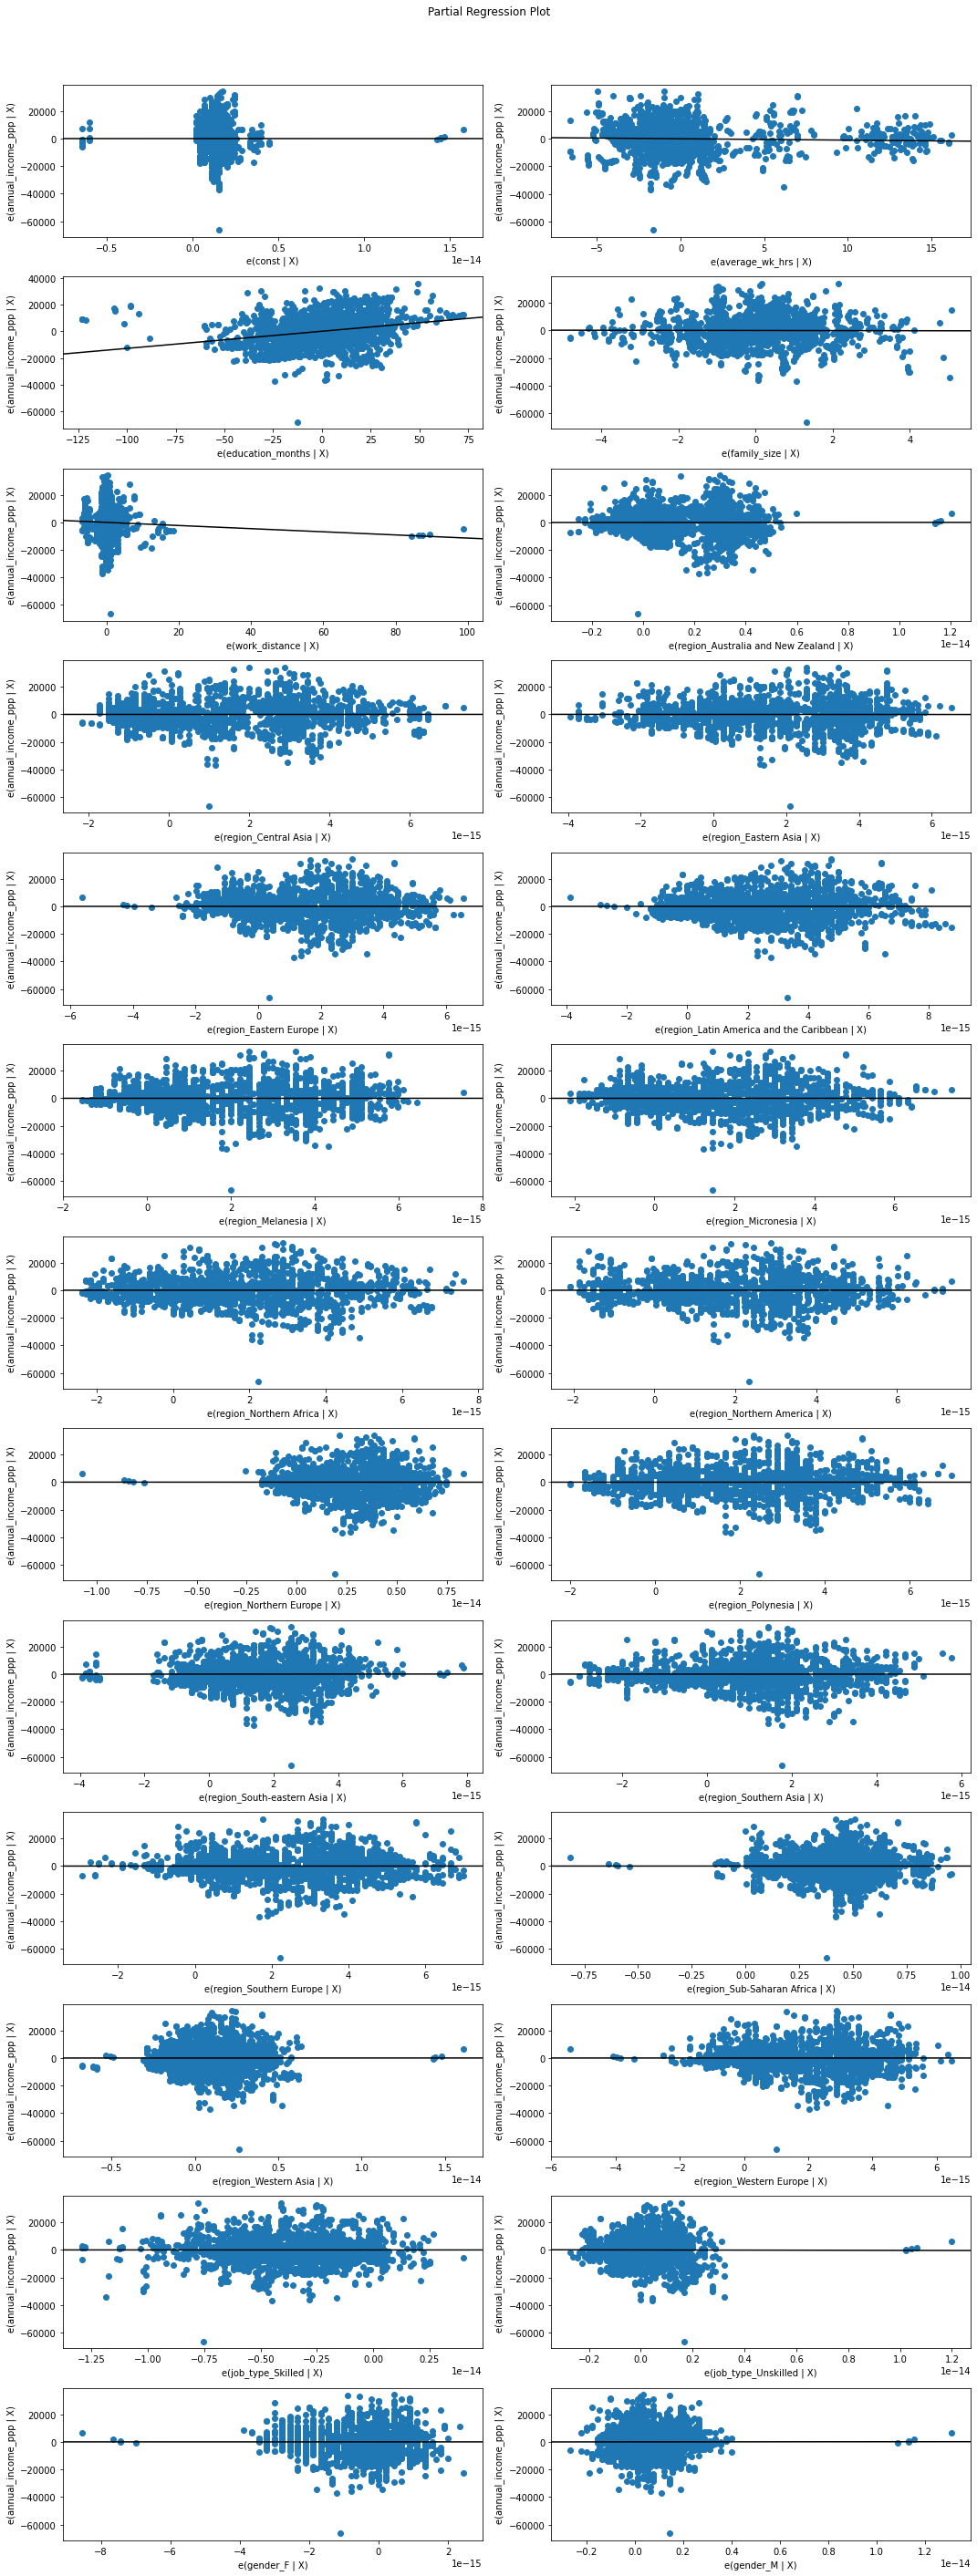

In [48]:
# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = plt.figure(figsize=(15,40))
fig = sm.graphics.plot_partregress_grid(est1, fig=fig)

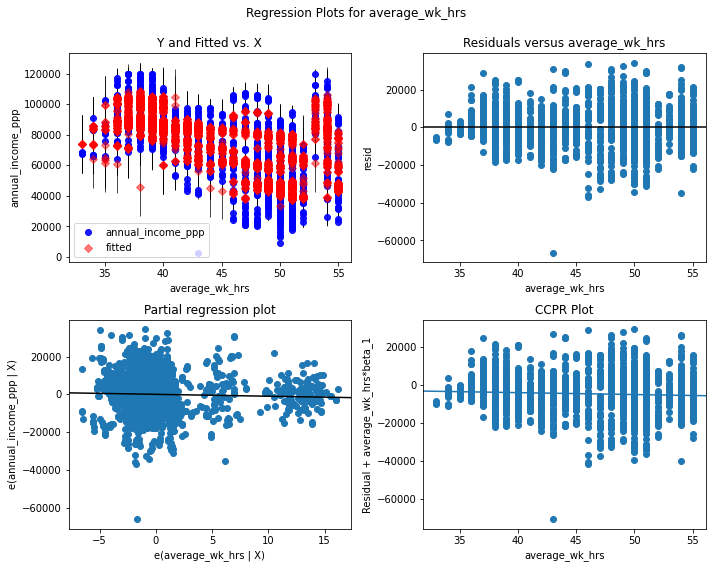

In [50]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(est1, "average_wk_hrs", fig=fig)

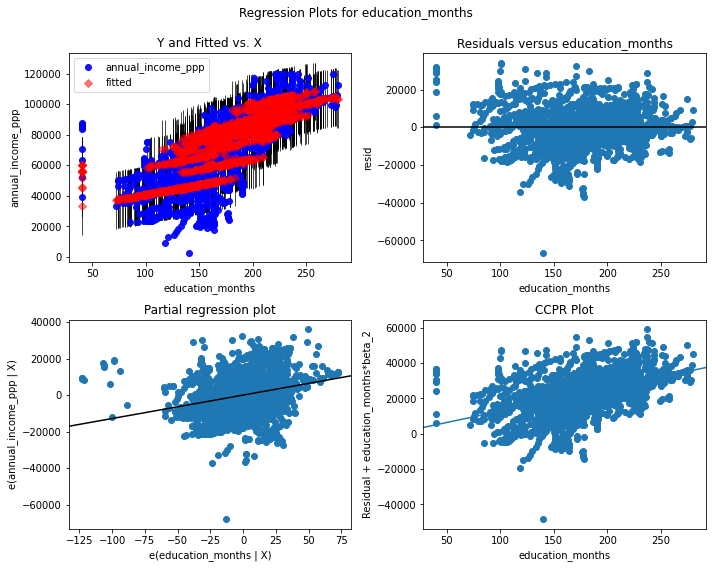

In [51]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(est1, "education_months", fig=fig)

In [52]:
data['region'].value_counts()

Sub-Saharan Africa                 615
Latin America and the Caribbean    435
Western Asia                       237
Southern Europe                    151
Northern Europe                    135
South-eastern Asia                 135
Southern Asia                      121
Western Europe                     105
Eastern Europe                     105
Northern Africa                     75
Central Asia                        75
Melanesia                           60
Eastern Asia                        45
Australia and New Zealand           30
Polynesia                           30
Micronesia                          30
Northern America                    15
Name: region, dtype: int64

In [63]:
def attribute_continent(region):
    if 'Africa' in region:
        return 'Africa'
    elif 'Asia' in region :
        return 'Asia'
    elif 'Europe' in region:
        return 'Europe'
    elif 'America' in region:
        return 'America'
    else:
        return 'Oceania'

data['continent'] = data['region'].apply(attribute_continent)

In [64]:
data['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

In [65]:
data.head()

,annual_income_ppp,average_wk_hrs,education_months,region,job_type,gender,family_size,work_distance,continent
0,66417.0,50.0,157.0,Southern Asia,Unskilled,F,5.0,3.0,Asia
1,55124.0,50.0,156.0,Southern Asia,Unskilled,F,5.0,0.0,Asia
2,55124.0,50.0,155.0,Southern Asia,Unskilled,F,5.0,3.0,Asia
3,54238.0,50.0,154.0,Southern Asia,Unskilled,F,5.0,0.0,Asia
4,53573.0,50.0,150.0,Southern Asia,Unskilled,F,4.0,0.0,Asia


In [70]:
import statsmodels.formula.api as smf

model2 = smf.ols(
    formula = "annual_income_ppp ~ education_months + C(continent, Treatment(reference='Europe')) + C(job_type, Treatment(reference='Unskilled')) + C(gender, Treatment(reference='F')) + work_distance",
    data=data
)

est2 = model2.fit()

est2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Ordinary least squares
======================================================================================================================
Model:                                OLS                               Adj. R-squared:                     0.744     
Dependent Variable:                   annual_income_ppp                 AIC:                                51282.4928
Date:                                 2021-09-09 14:50                  BIC:                                51334.5381
No. Observations:                     2399                              Log-Likelihood:                     -25632.   
Df Model:                             8                                 F-statistic:                        870.9     
Df Residuals:                         2390                              Prob (F-statistic):                 0.00      
R-squared:                            0.745                             Scale:                              1.1211e+08
----------------------------------------------------------------------------------------------------------------------
                                                            Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------------------------------------------
Intercept                                                 40813.3349 1732.9741  23.5510 0.0000  37415.0471  44211.6227
C(continent, Treatment(reference='Europe'))[T.Africa]    -16815.7112  948.7833 -17.7234 0.0000 -18676.2345 -14955.1880
C(continent, Treatment(reference='Europe'))[T.America]     1969.9014  917.4490   2.1472 0.0319    170.8233   3768.9796
C(continent, Treatment(reference='Europe'))[T.Asia]       -1092.5602  855.9918  -1.2764 0.2019  -2771.1234    586.0030
C(continent, Treatment(reference='Europe'))[T.Oceania]    -3245.2565 1084.1748  -2.9933 0.0028  -5371.2767  -1119.2363
C(job_type, Treatment(reference='Unskilled'))[T.Skilled]   7883.4598  860.4872   9.1616 0.0000   6196.0814   9570.8383
C(gender, Treatment(reference='F'))[T.M]                  12264.1133  735.1831  16.6817 0.0000  10822.4509  13705.7758
education_months                                            166.7728    9.4000  17.7417 0.0000    148.3397    185.2058
work_distance                                              -119.6871   45.7336  -2.6171 0.0089   -209.3686    -30.0056
----------------------------------------------------------------------------------------------------------------------
Omnibus:                                73.228                        Durbin-Watson:                           0.342  
Prob(Omnibus):                          0.000                         Jarque-Bera (JB):                        177.711
Skew:                                   -0.097                        Prob(JB):                                0.000  
Kurtosis:                               4.319                         Condition No.:                           1811   
======================================================================================================================
* The condition number is large (2e+03). This might indicate             strong multicollinearity or other numerical
problems.
"""

The new model is not an improvement compared to the 1st model proposed with R² dropping from ca. 0.79 to 0.745. It may well be that removing average_wk_hrs and family_size, and/or compressing the details of the region into the main continents, were deleterious for the global fitting.  

Although the current model is much more interpretable, e.g. for all other variables constant, going from gender F to M increases the annual income by 12264 USD, same for skilled jobs, which show an increase by 7883 compared to Unskilled. Very similarly to the 1st model, each additional month of education increases the annual income by 167 USD, and each kilometer from home decreases the income by 120 USD.  

Interestingly, working in Africa decreases the annual income by 16815 USD, but in America increases it by 1969 UDS compared to Europe.  

These coefficients make sense, let's try to add an interaction between the education and gender.

In [73]:
model3 = smf.ols(
    formula = "annual_income_ppp ~ education_months + C(continent, Treatment(reference='Europe')) + C(job_type, Treatment(reference='Unskilled')) + C(gender, Treatment(reference='F')) + work_distance + education_months:C(gender, Treatment(reference='F'))",
    data=data
)

est3 = model3.fit()

est3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Results: Ordinary least squares
=======================================================================================================================
Model:                               OLS                                Adj. R-squared:                      0.757     
Dependent Variable:                  annual_income_ppp                  AIC:                                 51155.9249
Date:                                2021-09-09 15:01                   BIC:                                 51213.7529
No. Observations:                    2399                               Log-Likelihood:                      -25568.   
Df Model:                            9                                  F-statistic:                         831.0     
Df Residuals:                        2389                               Prob (F-statistic):                  0.00      
R-squared:                           0.758                              Scale:                               1.0630e+08
-----------------------------------------------------------------------------------------------------------------------
                                                             Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------------------------------------------
Intercept                                                  54904.2851 2087.4186  26.3025 0.0000  50810.9460  58997.6242
C(continent, Treatment(reference='Europe'))[T.Africa]     -15040.1038  936.7735 -16.0552 0.0000 -16877.0767 -13203.1308
C(continent, Treatment(reference='Europe'))[T.America]      3422.1834  902.3086   3.7927 0.0002   1652.7947   5191.5721
C(continent, Treatment(reference='Europe'))[T.Asia]         1084.1152  854.8691   1.2682 0.2049   -592.2467   2760.4771
C(continent, Treatment(reference='Europe'))[T.Oceania]     -2264.8851 1059.1850  -2.1383 0.0326  -4341.9019   -187.8684
C(job_type, Treatment(reference='Unskilled'))[T.Skilled]    5839.6471  856.6530   6.8168 0.0000   4159.7871   7519.5072
C(gender, Treatment(reference='F'))[T.M]                  -20776.9376 2968.6561  -6.9988 0.0000 -26598.3460 -14955.5293
education_months                                              49.1022   13.7499   3.5711 0.0004     22.1391     76.0652
education_months:C(gender, Treatment(reference='F'))[T.M]    210.3713   18.3435  11.4684 0.0000    174.4004    246.3421
work_distance                                                -98.7947   44.5709  -2.2166 0.0267   -186.1963    -11.3930
-----------------------------------------------------------------------------------------------------------------------
Omnibus:                               60.144                         Durbin-Watson:                            0.350  
Prob(Omnibus):                         0.000                          Jarque-Bera (JB):                         116.624
Skew:                                  -0.158                         Prob(JB):                                 0.000  
Kurtosis:                              4.033                          Condition No.:                            3794   
=======================================================================================================================
* The condition number is large (4e+03). This might indicate             strong multicollinearity or other numerical
problems.
"""

The model improved further with the addition of an interaction between the gender and the education, and there is an additional significant effect from this interaction.

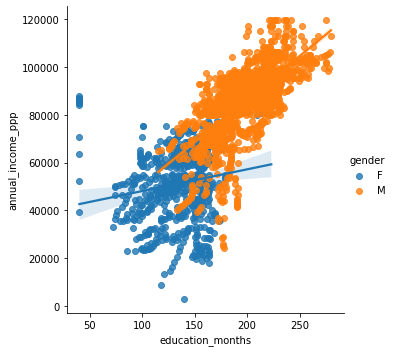

In [76]:
sns.lmplot(
    x='education_months',
    y='annual_income_ppp',
    data=data,
    hue='gender',
)